In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
df = pd.read_csv('../Resources/allzipcodes_collision_weather_df.csv')
df.set_index('collision_id',inplace = True)

/var/folders/_7/4zts0j8d4413ps8jq10scqsr0000gn/T/ipykernel_98773/2694705919.py:1: DtypeWarning: Columns (14,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Resources/allzipcodes_collision_weather_df.csv')


In [4]:
df["pedestrians_accident"] = (df["number_of_pedestrians_injured"] > 0) | (df["number_of_pedestrians_killed"] > 0)
df["cyclists_accident"] = (df["number_of_cyclist_injured"] > 0) | (df["number_of_cyclist_killed"] > 0)
df["motorists_accident"] = (df["number_of_motorist_injured"] > 0) | (df["number_of_motorist_killed"] > 0)

In [5]:
pedestrian_df = df[df["pedestrians_accident"] == 1]
cyclist_df = df[df["cyclists_accident"] == 1]
motorist_df = df[df["motorists_accident"] == 1]


Temporal Analysis for Accident Counts by Accident Types

/var/folders/_7/4zts0j8d4413ps8jq10scqsr0000gn/T/ipykernel_98773/997361350.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax = axes[0], x='crash_day_of_week', y='count', hue='accident_type', data=df_melted_day, palette='viridis', order = day_order, ci=None,legend = False)
/var/folders/_7/4zts0j8d4413ps8jq10scqsr0000gn/T/ipykernel_98773/997361350.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=axes[1], x='crash_hour_category', y='count', hue='accident_type', data=df_melted_hour, palette='viridis', order = hour_category_order, ci=None)


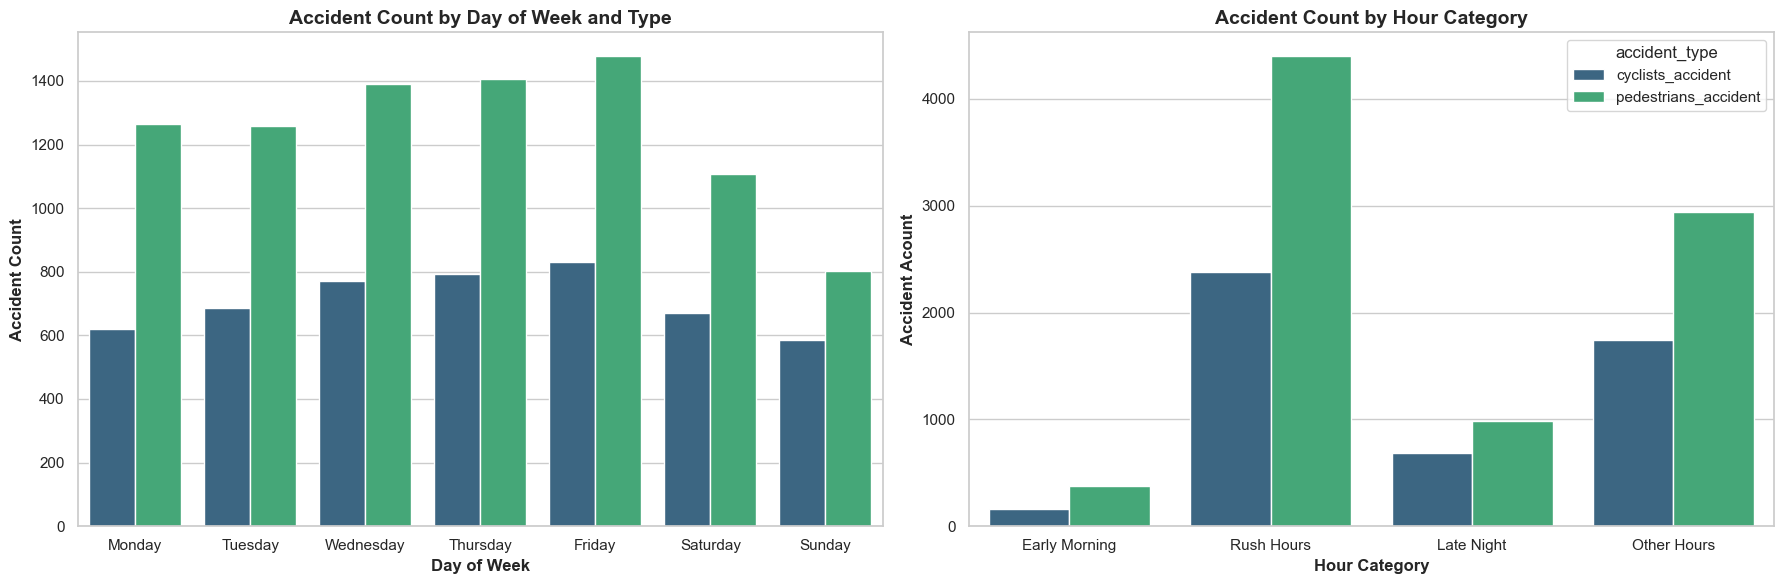

In [12]:
## Temporal Analysis for Pedestrian Involved Accidents
day_order = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']
crash_day = df.groupby('crash_day_of_week')[['cyclists_accident','pedestrians_accident']].sum()
crash_day.reset_index(inplace = True)
crash_day['crash_day_of_week'] = crash_day['crash_day_of_week'].map(pd.Series(day_order))
crash_hour = df.groupby('crash_hour_category')[['cyclists_accident','pedestrians_accident']].sum()
crash_hour.reset_index(inplace = True)

import matplotlib.pyplot as plt
import seaborn as sns
# Set the style of seaborn to 'whitegrid' for a professional look
sns.set_theme(style="whitegrid")

# Set up the matplotlib figure with two subplots (1 row, 3 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Melt the DataFrame for Seaborn
df_melted_day = crash_day.melt(id_vars='crash_day_of_week', var_name='accident_type', value_name='count')
# Create the stacked bar plot
sns.barplot(ax = axes[0], x='crash_day_of_week', y='count', hue='accident_type', data=df_melted_day, palette='viridis', order = day_order, ci=None,legend = False)
# Add labels and title
axes[0].set_xlabel('Day of Week',fontsize=12, fontweight='bold')
axes[0].set_ylabel('Accident Count',fontsize=12, fontweight='bold')
axes[0].set_title('Accident Count by Day of Week and Type',fontsize=14, fontweight='bold')


# Second subplot for the number of accidents by hour category
hour_category_order = ['Early Morning', 'Rush Hours', 'Late Night', 'Other Hours']
# Melt the DataFrame for Seaborn
df_melted_hour = crash_hour.melt(id_vars='crash_hour_category', var_name='accident_type', value_name='count')
sns.barplot(ax=axes[1], x='crash_hour_category', y='count', hue='accident_type', data=df_melted_hour, palette='viridis', order = hour_category_order, ci=None)
axes[1].set_title('Accident Count by Hour Category', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Hour Category',fontsize=12, fontweight='bold')
axes[1].set_ylabel('Accident Acount',fontsize=12, fontweight='bold')


# Adjust layout to prevent overlap and display all figure components properly
plt.tight_layout()

plt.savefig('../static/images/ts_nonmotorist.png', dpi=300, bbox_inches='tight')
# Display the plots
plt.show()



Unsurprisingly, most nonmotorists accidents take place during rush hours and weekdays, with Friday standing out the most. 

Let's break down the accidents by inflicted parties, that is, only pedestrians, only cyclists, both pedestrians and motorists, both pedestrians and cyclists, both cyclists and motorists, and pedestrians-cyclists-motorists all inflicted collisions. We are not interested in the only motorists cases as they are too common and including them in the graph would outweigh over the other two type of cases' presence.

Note that here, we define inflicted by whether the party is injured and/or dead from the accident. In other words, we only investigate the accidents whose severity level is not minor (no injuries and/or deaths)

In [14]:
inflicted_party = ["only pedestrians", "only cyclists", "pedestrians & motorists", "pedestrians & cyclists", "cyclists & motorists", "pedestrians, cyclists & motorists"]

op = df[(df["pedestrians_accident"] == 1) & (df["cyclists_accident"] == 0) & (df["motorists_accident"] == 0)]
oc = df[(df["pedestrians_accident"] == 0) & (df["cyclists_accident"] == 1) & (df["motorists_accident"] == 0)]
pm = df[(df["pedestrians_accident"] == 1) & (df["cyclists_accident"] == 0) & (df["motorists_accident"] == 1)]
pc = df[(df["pedestrians_accident"] == 1) & (df["cyclists_accident"] == 1) & (df["motorists_accident"] == 0)]
cm = df[(df["pedestrians_accident"] == 0) & (df["cyclists_accident"] == 1) & (df["motorists_accident"] == 1)]
pcm = df[(df["pedestrians_accident"] == 1) & (df["cyclists_accident"] == 1) & (df["motorists_accident"] == 1)]

ratio_op = op['severity_of_accident'].value_counts(normalize=True)
ratio_oc = oc['severity_of_accident'].value_counts(normalize=True)
ratio_pm = pm['severity_of_accident'].value_counts(normalize=True)
ratio_pc = pc['severity_of_accident'].value_counts(normalize=True)
ratio_cm = cm['severity_of_accident'].value_counts(normalize=True)
ratio_pcm = pcm['severity_of_accident'].value_counts(normalize=True)

severity = ["Serious (Low)", "Serious (Medium)", "Serious (High)", "Fatal", "Very Fatal"]
severity_data = {
    "counts":[len(op),len(oc),len(pm),len(pc),len(cm),len(pcm)]
}

for s in severity: 
    severity_data[s] = [ratio_op.get(s, 0), ratio_oc.get(s, 0), ratio_pm.get(s, 0), ratio_pc.get(s, 0),ratio_cm.get(s,0), ratio_pcm.get(s,0)]

severity_count_df = pd.DataFrame(severity_data,index = inflicted_party)
severity_count_df


,counts,Serious (Low),Serious (Medium),Serious (High),Fatal,Very Fatal
only pedestrians,8508,0.949342,0.037612,0.000235,0.012811,0.000000
only cyclists,4859,0.975509,0.020580,0.000000,0.003910,0.000000
pedestrians & motorists,155,0.000000,0.825806,0.045161,0.122581,0.006452
pedestrians & cyclists,45,0.000000,0.977778,0.000000,0.022222,0.000000
cyclists & motorists,51,0.000000,0.980392,0.019608,0.000000,0.000000
"pedestrians, cyclists & motorists",2,0.000000,0.000000,0.000000,1.000000,0.000000


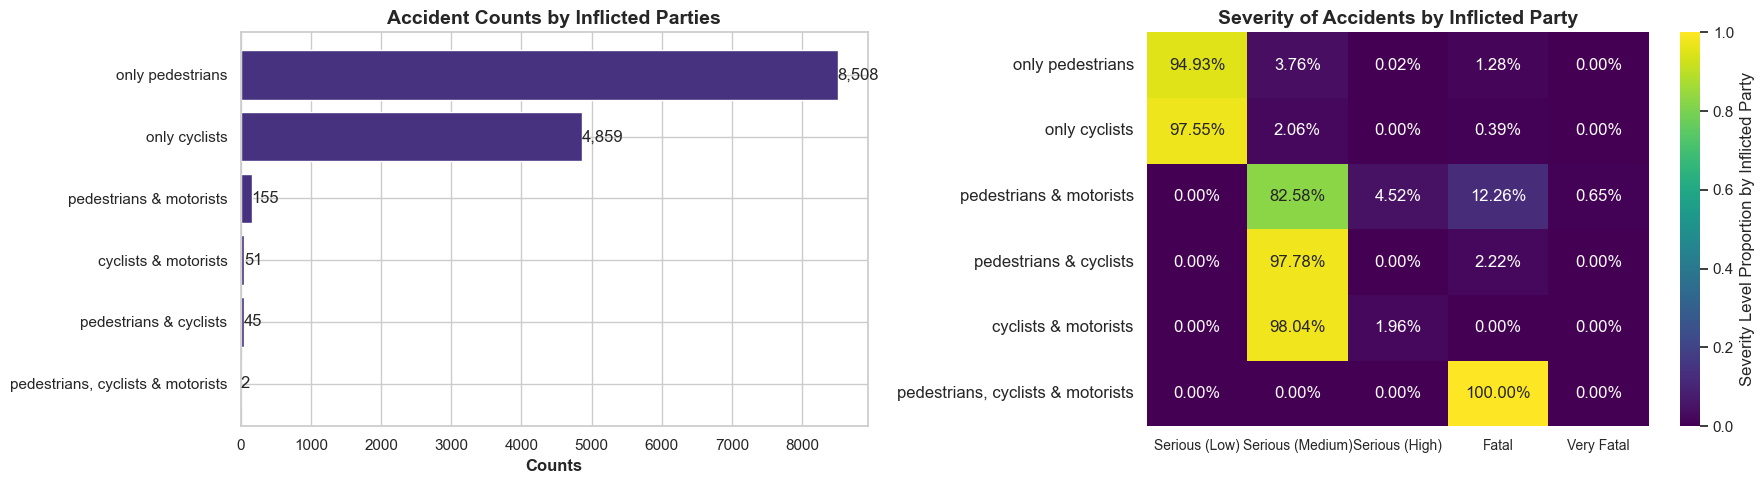

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn to 'whitegrid' for a professional look
sns.set_theme(style="whitegrid")
# Set a seaborn color palette
sns.set_palette("viridis")

# Set up the matplotlib figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

# Sort the DataFrame by 'counts' in ascending order
severity_count_df_sorted = severity_count_df.sort_values(by='counts')

# A plot for the accident counts by inflicted party 
bars = axes[0].barh(severity_count_df_sorted.index, severity_count_df_sorted['counts'])
# Add values beside each bar
for bar in bars:
    axes[0].text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():,.0f}', ha='left', va='center')
# Add labels and title
axes[0].set_xlabel('Counts', fontsize=12, fontweight='bold')
axes[0].set_title('Accident Counts by Inflicted Parties', fontsize=14, fontweight='bold')


# A plot for the severity of accidents by inflicted party
severity = sns.heatmap(severity_count_df.drop('counts', axis=1), annot=True, fmt='.2%', cmap='viridis', cbar_kws={'label': 'Severity Level Proportion by Inflicted Party'},
            annot_kws={"size": 12}, ax=axes[1])
severity.set_xticklabels(severity.get_xticklabels(),fontsize = 10)
severity.set_yticklabels(severity.get_yticklabels(), fontsize = 12)
axes[1].set_title('Severity of Accidents by Inflicted Party', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='y') 
axes[1].tick_params(axis='x',rotation = 360) 

# Adjust layout to prevent overlap and display all figure components properly
plt.tight_layout()

plt.savefig('../static/images/details_nonmotorist.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


These adjacent plots display accident counts and the relative frequency of accidents at various severity levels involving nonmotorists. The left plot suggests that pedestrians are more susceptible to injuries in accidents, with the majority involving fewer than 3 people. As the number of parties involved in an accident increases, the severity level tends to rise. Notably, the two accidents involving pedestrians, cyclists, and motorists resulted in fatalities.

In [585]:
df.columns

Index(['crash_datetime', 'crash_day_of_week', 'crash_hour_category',
       'street_address', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'vehicle_type_code_1',
       'vehicle_type_code_2', 'borough', 'zip_code', 'latitude', 'longitude',
       'vehicle_type_code_3', 'vehicle_type_code_4', 'Density', 'Population',
       'contributing_factor', 'number_of_injuries', 'number_of_deaths',
       'injuries_rate', 'death_rate', 'severity_of_accident', 'date', 'hour',
       'tempmax', 'tempmin', 'temp', 'humidity', 'precip', 'preciptype',
       'snow', 'windspeed', 'visibility', 'severerisk', 'sunrise', 'sunset',
       'icon', 'temperature_category', 'precip_category', 'humid_category',
       'wind_level', 'vis_level', 'Density_rank', 'zip_code_count',
       'total_inf

Now, we want to investigate how different the top contributing factors are for pedestrians and cyclists accidents

In [16]:
op.loc[op['contributing_factor'] == "Pedestrian/Bicyclist/Other Pedestrian Error/Confusion", 'contributing_factor'] = "Pedestrian Error/Confusion"
top_contributing_factors_p = op['contributing_factor'][~op['contributing_factor'].isin(["Unspecified", "Other Vehicular"])].value_counts(normalize=True).head(5).index
top_contributing_factors_p = top_contributing_factors_p.to_list()
top_contributing_factors_p

['Driver Inattention/Distraction',
 'Failure to Yield Right-of-Way',
 'Backing Unsafely',
 'Pedestrian Error/Confusion',
 'Unsafe Speed']

In [17]:
oc.loc[oc['contributing_factor'] == "Pedestrian/Bicyclist/Other Pedestrian Error/Confusion", 'contributing_factor'] = "Bicyclist Error/Confusion"
top_contributing_factors_c = oc['contributing_factor'][~oc['contributing_factor'].isin(["Unspecified", "Other Vehicular"])].value_counts(normalize=True).head(5).index
top_contributing_factors_c = top_contributing_factors_c.to_list()
top_contributing_factors_c

['Driver Inattention/Distraction',
 'Failure to Yield Right-of-Way',
 'Bicyclist Error/Confusion',
 'Traffic Control Disregarded',
 'Passing or Lane Usage Improper']

In [19]:
pc.loc[pc['contributing_factor'] == "Pedestrian/Bicyclist/Other Pedestrian Error/Confusion", 'contributing_factor'] = "Pedestrian/Bicyclist Error"
top_contributing_factors_pc = pc['contributing_factor'][~pc['contributing_factor'].isin(["Unspecified", "Other Vehicular"])].value_counts(normalize=True).head(5).index
top_contributing_factors_pc = top_contributing_factors_pc.to_list()
top_contributing_factors_pc

['Driver Inattention/Distraction',
 'Failure to Yield Right-of-Way',
 'Unsafe Speed',
 'Pedestrian/Bicyclist Error',
 'Traffic Control Disregarded']

In [20]:
prop_pc = pc['contributing_factor'][pc['contributing_factor'].isin(top_contributing_factors_pc)].value_counts(normalize=True)
pc_cf = pd.DataFrame(prop_pc)
pc_cf

,proportion
contributing_factor,
Driver Inattention/Distraction,0.370370
Failure to Yield Right-of-Way,0.185185
Unsafe Speed,0.185185
Pedestrian/Bicyclist Error,0.185185
Traffic Control Disregarded,0.074074


In [21]:
prop_p = op['contributing_factor'][op['contributing_factor'].isin(top_contributing_factors_p)].value_counts(normalize=True)
ped_cf = pd.DataFrame(prop_p)
ped_cf

,proportion
contributing_factor,
Driver Inattention/Distraction,0.422872
Failure to Yield Right-of-Way,0.416551
Backing Unsafely,0.062809
Pedestrian Error/Confusion,0.062216
Unsafe Speed,0.035552


In [22]:
prop_c = oc['contributing_factor'][oc['contributing_factor'].isin(top_contributing_factors_c)].value_counts(normalize=True)
cyc_cf = pd.DataFrame(prop_c)
cyc_cf

,proportion
contributing_factor,
Driver Inattention/Distraction,0.495367
Failure to Yield Right-of-Way,0.213104
Bicyclist Error/Confusion,0.140304
Traffic Control Disregarded,0.084050
Passing or Lane Usage Improper,0.067174


Create heatmap that shows correlation between weather and contributing factors for both pedestrians and cyclists cases

First create heatmap dataframe for pedestrians accidents

In [23]:
# Filter data for rainy, non-rainy, and snowy days
rainy_days = op[op['icon'] == 'rain']
cloudy_days = op[op['icon'] == 'cloudy']
clear_days = op[op['icon'] == 'clear-day']
snowy_days = op[op['icon'] == 'snow']

# Calculate the ratio of each contributing factor to total accidents under each condition
ratio_rainy = rainy_days['contributing_factor'][rainy_days['contributing_factor'].isin(top_contributing_factors_p)].value_counts(normalize=True)
ratio_cloudy= cloudy_days['contributing_factor'][cloudy_days['contributing_factor'].isin(top_contributing_factors_p)].value_counts(normalize=True)
ratio_clear= clear_days['contributing_factor'][clear_days['contributing_factor'].isin(top_contributing_factors_p)].value_counts(normalize=True) 
ratio_snowy= snowy_days['contributing_factor'][snowy_days['contributing_factor'].isin(top_contributing_factors_p)].value_counts(normalize=True) 

weather_data = {}
# Create a DataFrame for the heatmap
for factor in top_contributing_factors_p: 
    weather_data[factor] = [ratio_rainy.get(factor, 0), ratio_cloudy.get(factor, 0), ratio_clear.get(factor, 0), ratio_snowy.get(factor, 0)]

heatmap_data_weather_cf_p = pd.DataFrame(weather_data, index=['rainy', 'cloudy', 'clear', 'snowy'])

In [24]:
heatmap_data_weather_cf_p

,Driver Inattention/Distraction,Failure to Yield Right-of-Way,Backing Unsafely,Pedestrian Error/Confusion,Unsafe Speed
rainy,0.432908,0.413990,0.064232,0.057193,0.031676
cloudy,0.426579,0.389664,0.068089,0.074651,0.041017
clear,0.412723,0.424360,0.057409,0.067494,0.038014
snowy,0.372340,0.517730,0.053191,0.024823,0.031915


Next create a similar heatmap df for cyclists accidents

In [25]:
# Filter data for rainy, non-rainy, and snowy days
rainy_days = oc[oc['icon'] == 'rain']
cloudy_days = oc[oc['icon'] == 'cloudy']
clear_days = oc[oc['icon'] == 'clear-day']
snowy_days = oc[oc['icon'] == 'snow']

# Calculate the ratio of each severity level to total accidents for each condition
ratio_rainy = rainy_days['contributing_factor'][rainy_days['contributing_factor'].isin(top_contributing_factors_c)].value_counts(normalize=True)
ratio_cloudy= cloudy_days['contributing_factor'][cloudy_days['contributing_factor'].isin(top_contributing_factors_c)].value_counts(normalize=True)
ratio_clear= clear_days['contributing_factor'][clear_days['contributing_factor'].isin(top_contributing_factors_c)].value_counts(normalize=True) 
ratio_snowy= snowy_days['contributing_factor'][snowy_days['contributing_factor'].isin(top_contributing_factors_c)].value_counts(normalize=True) 

weather_data = {}
# Create a DataFrame for the heatmap
for factor in top_contributing_factors_c: 
    weather_data[factor] = [ratio_rainy.get(factor, 0), ratio_cloudy.get(factor, 0), ratio_clear.get(factor, 0), ratio_snowy.get(factor, 0)]

heatmap_data_weather_cf_c = pd.DataFrame(weather_data, index=['rainy', 'cloudy', 'clear', 'snowy'])

In [26]:
heatmap_data_weather_cf_c

,Driver Inattention/Distraction,Failure to Yield Right-of-Way,Bicyclist Error/Confusion,Traffic Control Disregarded,Passing or Lane Usage Improper
rainy,0.496824,0.210303,0.138320,0.083275,0.071277
cloudy,0.506427,0.197943,0.141388,0.092545,0.061697
clear,0.484169,0.230871,0.142480,0.076517,0.065963
snowy,0.463768,0.246377,0.144928,0.086957,0.057971


Last create one for the accidents in which both pedestrians and cyclists are inflicted

In [27]:
# Filter data for rainy, non-rainy, and snowy days
rainy_days = pc[pc['icon'] == 'rain']
cloudy_days = pc[pc['icon'] == 'cloudy']
clear_days = pc[pc['icon'] == 'clear-day']
snowy_days = pc[pc['icon'] == 'snow']

# Calculate the ratio of each severity level to total accidents for each condition
ratio_rainy = rainy_days['contributing_factor'][rainy_days['contributing_factor'].isin(top_contributing_factors_pc)].value_counts(normalize=True)
ratio_cloudy= cloudy_days['contributing_factor'][cloudy_days['contributing_factor'].isin(top_contributing_factors_pc)].value_counts(normalize=True)
ratio_clear= clear_days['contributing_factor'][clear_days['contributing_factor'].isin(top_contributing_factors_pc)].value_counts(normalize=True) 
ratio_snowy= snowy_days['contributing_factor'][snowy_days['contributing_factor'].isin(top_contributing_factors_pc)].value_counts(normalize=True) 

weather_data = {}
# Create a DataFrame for the heatmap
for factor in top_contributing_factors_pc: 
    weather_data[factor] = [ratio_rainy.get(factor, 0), ratio_cloudy.get(factor, 0), ratio_clear.get(factor, 0), ratio_snowy.get(factor, 0)]

heatmap_data_weather_cf_pc = pd.DataFrame(weather_data, index=['rainy', 'cloudy', 'clear', 'snowy'])

In [28]:
heatmap_data_weather_cf_pc

,Driver Inattention/Distraction,Failure to Yield Right-of-Way,Unsafe Speed,Pedestrian/Bicyclist Error,Traffic Control Disregarded
rainy,0.363636,0.090909,0.181818,0.272727,0.090909
cloudy,0.333333,0.000000,0.333333,0.333333,0.000000
clear,0.400000,0.400000,0.100000,0.000000,0.100000
snowy,0.000000,0.000000,0.000000,0.000000,0.000000


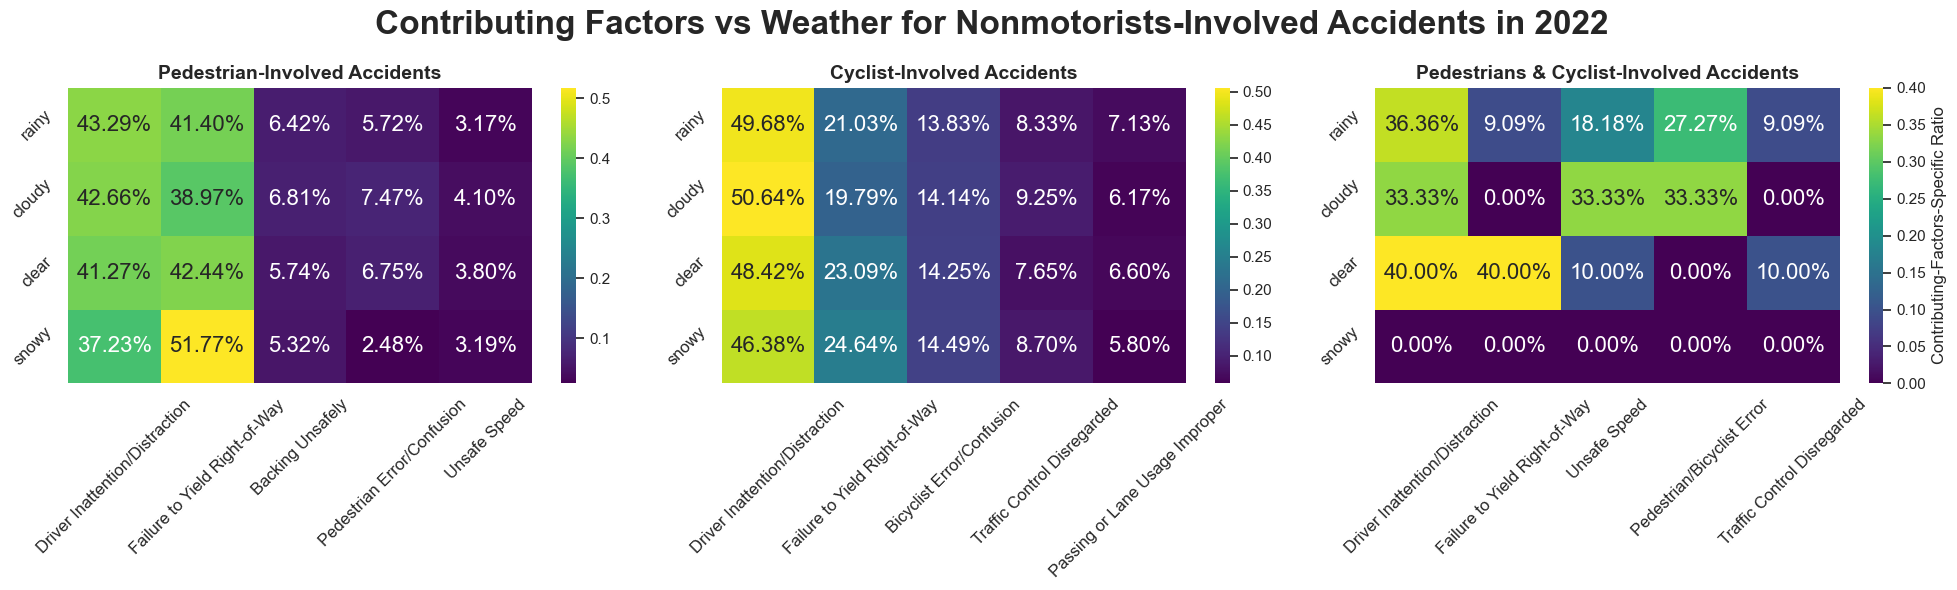

In [29]:
# Set up the first plot that shows the overall impact of weather on contributing factors
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn to 'whitegrid' for a professional look
sns.set_theme(style="whitegrid")
# Set a seaborn color palette
sns.set_palette("viridis")

# Set up the matplotlib figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
fig.suptitle('Contributing Factors vs Weather for Nonmotorists-Involved Accidents in 2022', fontsize=24, fontweight='bold')

# first subplot that shows the heatmap for pedestrians accidents
ped = sns.heatmap(heatmap_data_weather_cf_p, annot = True, fmt='.2%', cmap='viridis',
            annot_kws={"size": 16}, ax = axes[0])
ped.set_xticklabels(ped.get_xticklabels(),fontsize = 12)
ped.set_yticklabels(ped.get_yticklabels(), fontsize = 12)
axes[0].set_title('Pedestrian-Involved Accidents', fontsize=14,fontweight = "bold")
axes[0].tick_params(axis='x', rotation=45) 
axes[0].tick_params(axis='y', rotation=45) 

# second subplot that shows the heatmap for cyclists accidents
cyc = sns.heatmap(heatmap_data_weather_cf_c, annot=True, fmt='.2%', cmap='viridis',
            annot_kws={"size": 16}, ax=axes[1])
cyc.set_xticklabels(cyc.get_xticklabels(),fontsize = 12)
cyc.set_yticklabels(cyc.get_yticklabels(), fontsize = 12)
axes[1].set_title('Cyclist-Involved Accidents', fontsize=14,fontweight = "bold")
axes[1].tick_params(axis='x',rotation = 45) 
axes[1].tick_params(axis='y',rotation=45) 

# third subplot that shows the heatmap for pedestrians & cyclists accidents
ped_cyc = sns.heatmap(heatmap_data_weather_cf_pc, annot=True, fmt='.2%', cmap='viridis', cbar_kws={'label': 'Contributing-Factors-Specific Ratio'},
            annot_kws={"size": 16}, ax=axes[2])
ped_cyc.set_xticklabels(ped_cyc.get_xticklabels(),fontsize = 12)
ped_cyc.set_yticklabels(ped_cyc.get_yticklabels(), fontsize = 12)
axes[2].set_title('Pedestrians & Cyclist-Involved Accidents', fontsize=14,fontweight = "bold")
axes[2].tick_params(axis='x',rotation = 45) 
axes[2].tick_params(axis='y',rotation=45) 

# Adjust layout to prevent overlap and display all figure components properly
plt.tight_layout()

plt.savefig('../static/images/contributingfactors_nonmotorist.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


Driver Inattention/Distraction consistently dominates as a leading factor across all conditions and accident types, maintaining its prominence. On snowy days, Failure to Yield Right-of-Way is also prevalent, constituting 51.77% of pedestrian-involved accidents and 24.64% of cyclist-involved accidents. A noteworthy trend emerges when comparing contributing factors between pedestrians and cyclists, with Bicyclist error taking a more significant role in causing accidents, surpassing Pedestrian error in cases involving nonmotorists. For the rightmost chart, despite variations in contributing factors across different weather conditions for accidents involving both pedestrians and cyclists, the total number of cases is 45, potentially tempering the observable effects shown in this plot. 

We can delve deeper into the impact of additional weather details on accidents involving cyclists, considering some noticeable differences across various weather conditions. In contrast, the plot for pedestrian-involved accidents show few discernible differences. Additionally, for accidents involving both pedestrians and cyclists, the limited total cases (45) may mitigate the observable effects shown in the plot

In [30]:
# Filter data for different precipitation levels
dry_days = oc[oc['precip_category'] == 'Dry']
light_days = oc[oc['precip_category'] == 'Light']
moderate_days = oc[oc['precip_category'] == 'Moderate']
heavy_days = oc[oc['precip_category'] == 'Heavy']

# Calculate the ratio of each factor level to total accidents for each condition
ratio_dry = dry_days['contributing_factor'][dry_days['contributing_factor'].isin(top_contributing_factors_c)].value_counts(normalize=True)
ratio_light = light_days['contributing_factor'][light_days['contributing_factor'].isin(top_contributing_factors_c)].value_counts(normalize=True)
ratio_moderate = moderate_days['contributing_factor'][moderate_days['contributing_factor'].isin(top_contributing_factors_c)].value_counts(normalize=True)
ratio_heavy = heavy_days['contributing_factor'][heavy_days['contributing_factor'].isin(top_contributing_factors_c)].value_counts(normalize=True)

# Create a DataFrame for the heatmap
precip_data = {}
for factor in top_contributing_factors_c:
    precip_data[factor] = [ratio_dry.get(factor, 0), ratio_light.get(factor, 0), ratio_moderate.get(factor, 0), ratio_heavy.get(factor, 0)]

heatmap_data_precip_cf = pd.DataFrame(precip_data, index=['Dry', 'Light', 'Moderate', 'Heavy'])

# Filter data for different temperature levels
fc_days = oc[oc['temperature_category'] == 'Freezing Cold']
cold_days = oc[oc['temperature_category'] == 'Cold']
mod_days = oc[oc['temperature_category'] == 'Moderate']
warm_days = oc[oc['temperature_category'] == 'Warm']
hot_days = oc[oc['temperature_category'] == 'Hot']

# Calculate the ratio of each factor level to total accidents for each condition
ratio_fc_temp = fc_days['contributing_factor'][fc_days['contributing_factor'].isin(top_contributing_factors_c)].value_counts(normalize=True)
ratio_cold_temp = cold_days['contributing_factor'][cold_days['contributing_factor'].isin(top_contributing_factors_c)].value_counts(normalize=True)
ratio_mod_temp = mod_days['contributing_factor'][mod_days['contributing_factor'].isin(top_contributing_factors_c)].value_counts(normalize=True)
ratio_warm_temp = warm_days['contributing_factor'][warm_days['contributing_factor'].isin(top_contributing_factors_c)].value_counts(normalize=True)
ratio_hot_temp = hot_days['contributing_factor'][hot_days['contributing_factor'].isin(top_contributing_factors_c)].value_counts(normalize=True)

# Create a DataFrame for the heatmap
temp_data = {}
for factor in top_contributing_factors_c:
    temp_data[factor] = [ratio_fc_temp.get(factor, 0), ratio_cold_temp.get(factor, 0), ratio_mod_temp.get(factor, 0), ratio_warm_temp.get(factor, 0), ratio_hot_temp.get(factor, 0)]

heatmap_data_temp_cf = pd.DataFrame(temp_data, index=['Freezing Cold', 'Cold', 'Moderate', 'Warm', 'Hot'])

# Filter data for different visibility levels
low_vis = oc[oc['vis_level'] == 'Poor']
mod_vis = oc[oc['vis_level'] == 'Moderate']
good_vis = oc[oc['vis_level'] == 'Good']

# Calculate the ratio of each factor level to total accidents for each condition
ratio_low_vis = low_vis['contributing_factor'][low_vis['contributing_factor'].isin(top_contributing_factors_c)].value_counts(normalize=True)
ratio_mod_vis = mod_vis['contributing_factor'][mod_vis['contributing_factor'].isin(top_contributing_factors_c)].value_counts(normalize=True)
ratio_good_vis = good_vis['contributing_factor'][good_vis['contributing_factor'].isin(top_contributing_factors_c)].value_counts(normalize=True)

# Create a DataFrame for the heatmap
vis_data = {}
for factor in top_contributing_factors_c:
    vis_data[factor] = [ratio_low_vis.get(factor, 0), ratio_mod_vis.get(factor, 0), ratio_good_vis.get(factor, 0)]

heatmap_data_vis_cf = pd.DataFrame(vis_data, index=['Poor', 'Moderate', 'Good'])


# Filter data for different wind levels
flags_ripple = oc[oc['wind_level'] == 'Flags ripple']
flags_wave = oc[oc['wind_level'] == 'Flags wave']
leaves_scatter = oc[oc['wind_level'] == 'Leaves scatter']
small_trees_sway = oc[oc['wind_level'] == 'Small trees sway']
umbrellas_not_working = oc[oc['wind_level'] == 'Umbrellas not working']

# Calculate the ratio of each factor level to total accidents for each condition
ratio_flags_ripple = flags_ripple['contributing_factor'][flags_ripple['contributing_factor'].isin(top_contributing_factors_c)].value_counts(normalize=True)
ratio_flags_wave = flags_wave['contributing_factor'][flags_wave['contributing_factor'].isin(top_contributing_factors_c)].value_counts(normalize=True)
ratio_leaves_scatter = leaves_scatter['contributing_factor'][leaves_scatter['contributing_factor'].isin(top_contributing_factors_c)].value_counts(normalize=True)
ratio_small_trees_sway = small_trees_sway['contributing_factor'][small_trees_sway['contributing_factor'].isin(top_contributing_factors_c)].value_counts(normalize=True)
ratio_umbrellas_not_working = umbrellas_not_working['contributing_factor'][umbrellas_not_working['contributing_factor'].isin(top_contributing_factors_c)].value_counts(normalize=True)

# Create a DataFrame for the heatmap
wind_data = {}
for factor in top_contributing_factors_c:
    wind_data[factor] = [ratio_flags_ripple.get(factor, 0), ratio_flags_wave.get(factor, 0), ratio_leaves_scatter.get(factor, 0), ratio_small_trees_sway.get(factor, 0), ratio_umbrellas_not_working.get(factor, 0)]

heatmap_data_wind_cf = pd.DataFrame(wind_data, index=['Flags ripple', 'Flags wave', 'Leaves scatter', 'Small trees sway', 'Umbrellas not working'])


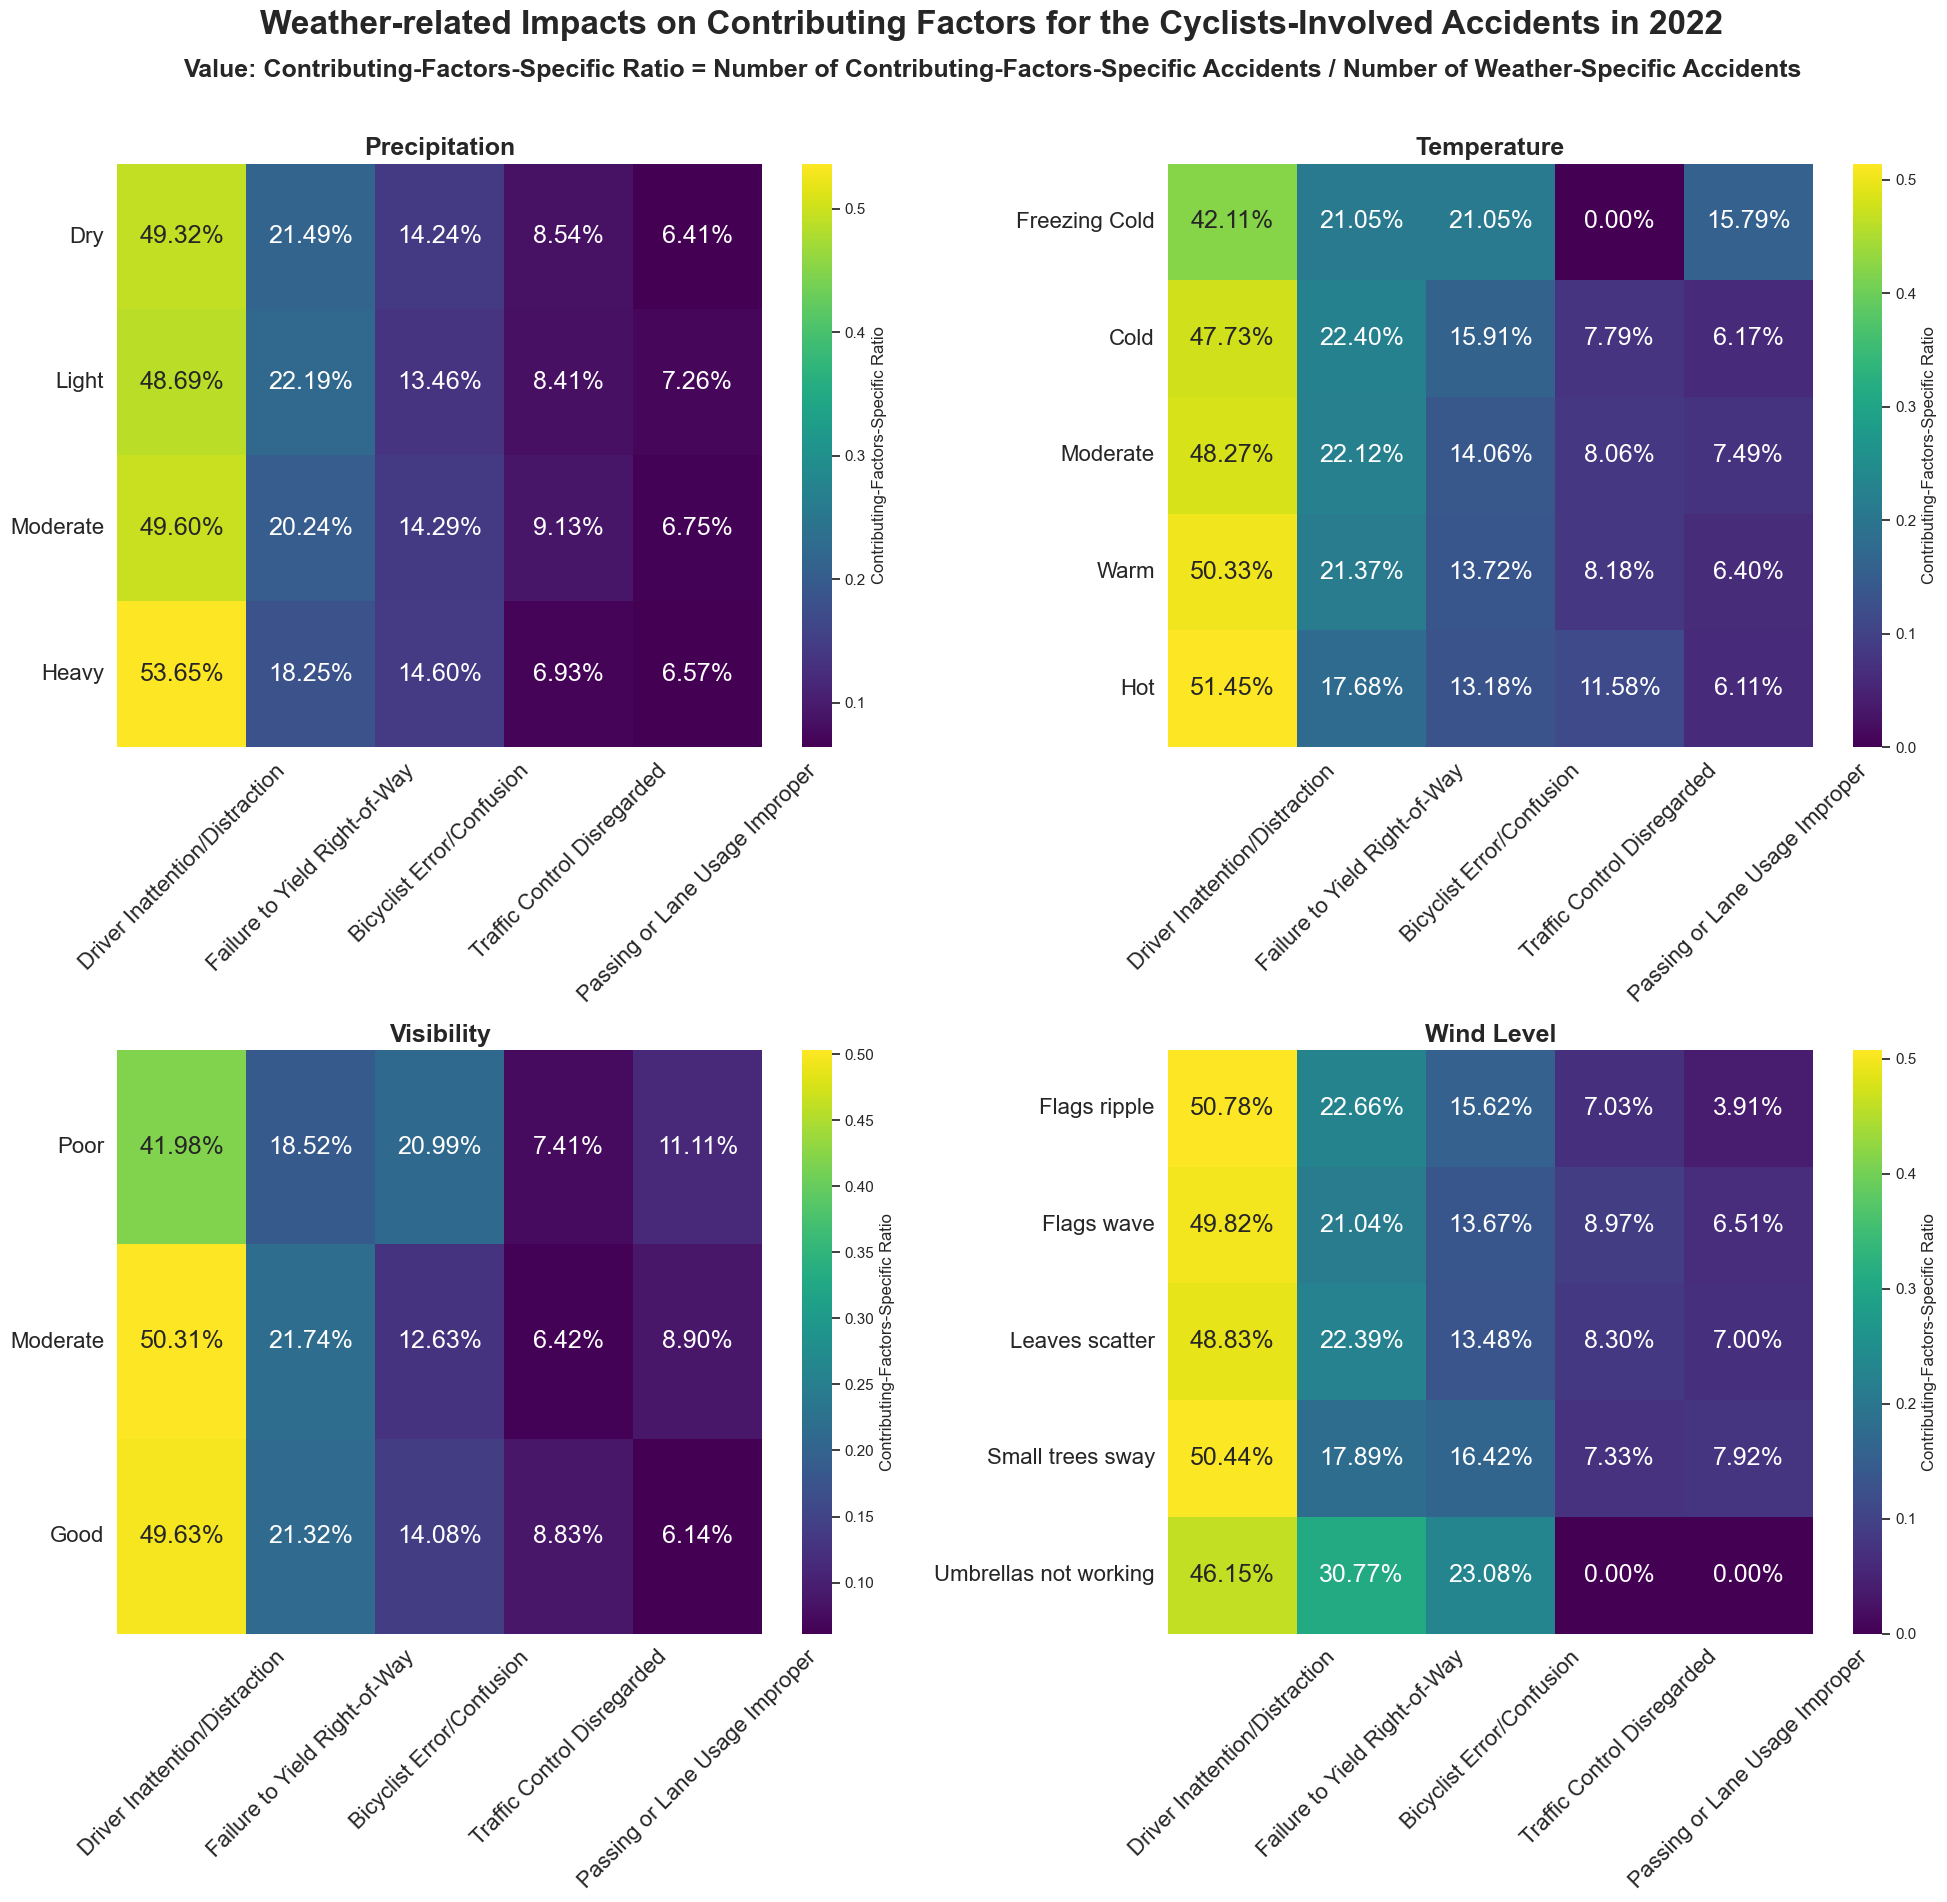

In [31]:
# Set up the plot for other weater details
# Set up the grid layout
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
fig.suptitle('Weather-related Impacts on Contributing Factors for the Cyclists-Involved Accidents in 2022', fontsize=24, fontweight = "bold")
fig.text(0.5, 0.95, 'Value: Contributing-Factors-Specific Ratio = Number of Contributing-Factors-Specific Accidents / Number of Weather-Specific Accidents',
         ha='center', va='center', fontsize=18, fontweight = "bold")

hm_precip = sns.heatmap(heatmap_data_precip_cf, annot=True, fmt='.2%', cmap='viridis', cbar_kws={'label': 'Contributing-Factors-Specific Ratio'},
            annot_kws={"size": 18}, ax = axes[0,0])
hm_precip.set_xticklabels(hm_precip.get_xticklabels(), fontsize=16)
hm_precip.set_yticklabels(hm_precip.get_yticklabels(), fontsize=16)
axes[0, 0].set_title('Precipitation',fontsize = 18,fontweight = "bold")
axes[0, 0].tick_params(axis='y', rotation=360) 
axes[0, 0].tick_params(axis='x', rotation=45) 

hm_temp = sns.heatmap(heatmap_data_temp_cf, annot=True, fmt='.2%', cmap='viridis', cbar_kws={'label': 'Contributing-Factors-Specific Ratio'}, 
            annot_kws={"size": 18},ax = axes[0,1])
hm_temp.set_xticklabels(hm_temp.get_xticklabels(), fontsize=16)
hm_temp.set_yticklabels(hm_temp.get_yticklabels(), fontsize=16)
axes[0, 1].set_title('Temperature',fontsize = 18, fontweight = "bold")
axes[0, 1].tick_params(axis='y', rotation=360)  
axes[0, 1].tick_params(axis='x', rotation=45)  

hm_humid = sns.heatmap(heatmap_data_vis_cf, annot=True, fmt='.2%', cmap='viridis', cbar_kws={'label': 'Contributing-Factors-Specific Ratio'}, 
            annot_kws={"size": 18}, ax = axes[1,0])
hm_humid.set_xticklabels(hm_humid.get_xticklabels(), fontsize=16)
hm_humid.set_yticklabels(hm_humid.get_yticklabels(), fontsize=16)
axes[1, 0].set_title('Visibility',fontsize = 18, fontweight = "bold")
axes[1, 0].tick_params(axis='y', rotation=360)  
axes[1, 0].tick_params(axis='x', rotation=45)  

hm_wind = sns.heatmap(heatmap_data_wind_cf, annot=True, fmt='.2%', cmap='viridis', cbar_kws={'label': 'Contributing-Factors-Specific Ratio'}, 
            annot_kws={"size": 18}, ax = axes[1,1])
hm_wind.set_xticklabels(hm_wind.get_xticklabels(), fontsize=16)
hm_wind.set_yticklabels(hm_wind.get_yticklabels(), fontsize=16)
axes[1, 1].set_title('Wind Level',fontsize = 18, fontweight = "bold")
axes[1, 1].tick_params(axis='y', rotation=360)  
axes[1, 1].tick_params(axis='x', rotation=45)  

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('../static/images/contributingfactors_cyclists.png', dpi=300, bbox_inches='tight')
plt.show()


This plot provides a detailed breakdown of the influence of additional weather details on contributing factors to cyclists-involved accidents. It reveals that Bicyclist error/confusion becomes more pronounced on extremely cold days, days characterized by poor visibility, or those with significantly strong wind intensity. These specific weather conditions appear to amplify the role of bicyclist error in contributing to accidents involving cyclists.